In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('symptoms_covid_list.csv')

In [76]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

,VAERS_ID,VAX_TYPE,SYMPTOM_TEXT,V_ADMINBY,FORM_VERS,SYMPTOM_LIST
0,2728994,COVID19,muscle at the injection site is sore; He canno...,PHM,2,"['sore', 'muscle pain', 'muscle pain', 'sore',..."
1,2729004,COVID19,Micro-seizures starting approximately 2 weeks ...,OTH,2,"['Seizures', 'seizure', 'auto-immune disease',..."
2,2729006,COVID19,"On September 14, 2023, I was admitted to Hospi...",PHM,2,"['Endocarditis', 'strep mitis', 'fever', 'chil..."
3,2729006,COVID19,"On September 14, 2023, I was admitted to Hospi...",PHM,2,"['Endocarditis', 'strep mitis', 'fever', 'chil..."
4,2729006,COVID19,"On September 14, 2023, I was admitted to Hospi...",PHM,2,"['Endocarditis', 'strep mitis', 'fever', 'chil..."
...,...,...,...,...,...,...
17420,2802236,COVID19,Covid Pfizer Vaccine was stored in the freezer...,UNK,2,[]
17421,2802237,COVID19,Covid Pfizer Vaccine was stored in the freezer...,UNK,2,[]
17422,2802238,COVID19,Covid Pfizer Vaccine was stored in the freezer...,UNK,2,[]
17423,2802239,COVID19,Covid Pfizer Vaccine was stored in the freezer...,UNK,2,[]


In [77]:
df = df[['VAERS_ID', 'SYMPTOM_TEXT', 'SYMPTOM_LIST']]

In [78]:
df1 = df[df['SYMPTOM_LIST'].apply(lambda x: bool(x) and len(x) > 0)]


In [79]:
# Filter DataFrame to keep rows where 'SYMPTOM_LIST' is non-empty and contains valid items
df1 = df[df['SYMPTOM_LIST'].apply(lambda x: isinstance(x, list) and len(x) > 0 and any(item.strip() for item in x))]


In [80]:
import ast

# Clean the strings and convert to lists
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: ast.literal_eval(x.strip()) if isinstance(x, str) else x)

# Alternatively, if you just want to strip the brackets and split the symptoms:
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: x.strip('[]').split(', ') if isinstance(x, str) else x)

# Print to check the updated SYMPTOM_LIST
print(df1[['VAERS_ID', 'SYMPTOM_LIST']])


Empty DataFrame
Columns: [VAERS_ID, SYMPTOM_LIST]
Index: []


In [81]:
# Length of symptom texts
df['SYMPTOM_TEXT_LENGTH'] = df['SYMPTOM_TEXT'].str.len()
df['SYMPTOM_LIST_LENGTH'] = df['SYMPTOM_LIST'].apply(lambda x: len(x))  # Assumes string representation of a list
print("\nLength of SYMPTOM_TEXT and SYMPTOM_LIST added to DataFrame.")


Length of SYMPTOM_TEXT and SYMPTOM_LIST added to DataFrame.


In [82]:
# Filter out rows where 'SYMPTOM_LIST' is exactly "[]"
df1 = df[df['SYMPTOM_LIST'] != "[]"]

for symptom_list in df1['SYMPTOM_LIST']:
    x = symptom_list.strip('[]')
    symptoms = [symptom.strip().strip("'") for symptom in x.split(',')]
    print(symptoms)



['sore', 'muscle pain', 'muscle pain', 'sore', 'pain', 'muscle pain', 'pain', 'muscle pain', 'pain', 'muscle pain', 'pain', 'sore']
['Seizures', 'seizure', 'auto-immune disease', 'Encephalitis']
['Endocarditis', 'strep mitis', 'fever', 'chills']
['Endocarditis', 'strep mitis', 'fever', 'chills']
['Endocarditis', 'strep mitis', 'fever', 'chills']
['12/30/23 Fever', 'aches', 'pains', 'fatigue', 'chills', 'sweats', 'diarrhea', 'loss of appetite', 'Fever', 'fatigue', 'diarhea', 'loss of appetite']
['shoulder pain', 'PCP']
['fog']
['respiratory failure', 'GERD', 'HTN', 'shortness of breath', 'fevers', 'respiratory distress', 'Sepsis', 'Pneumonia', 'infections', 'tachycardia', 'hypotensive', 'Urinary incontinence', 'urinary retention', 'incontinence', 'Hypomagnesemia', 'trauma', 'left shoulder pain', 'Anxiety', 'GERD']
['floaters', 'retinal tear', 'floaters', 'retinal tear']
['hypertension hyperlipidemia diabetes mellitus', 'nonobstructive coronary artery disease', 'congestive heart failure 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# 1. Basic Overview
print("First few rows of the dataset:")
print(df1.head())

First few rows of the dataset:
   VAERS_ID                                       SYMPTOM_TEXT   
0   2728994  muscle at the injection site is sore; He canno...  \
1   2729004  Micro-seizures starting approximately 2 weeks ...   
2   2729006  On September 14, 2023, I was admitted to Hospi...   
3   2729006  On September 14, 2023, I was admitted to Hospi...   
4   2729006  On September 14, 2023, I was admitted to Hospi...   

                                        SYMPTOM_LIST  SYMPTOM_TEXT_LENGTH   
0  ['sore', 'muscle pain', 'muscle pain', 'sore',...                 1916  \
1  ['Seizures', 'seizure', 'auto-immune disease',...                  645   
2  ['Endocarditis', 'strep mitis', 'fever', 'chil...                  709   
3  ['Endocarditis', 'strep mitis', 'fever', 'chil...                  709   
4  ['Endocarditis', 'strep mitis', 'fever', 'chil...                  709   

   SYMPTOM_LIST_LENGTH  
0                  131  
1                   62  
2                   50  
3        

In [84]:
# 2. Summary Statistics
print("\nData types and non-null counts:")
print(df1.info())
print("\nDescriptive statistics:")
print(df1.describe(include='all'))


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 11361 entries, 0 to 17418
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   VAERS_ID             11361 non-null  int64 
 1   SYMPTOM_TEXT         11361 non-null  object
 2   SYMPTOM_LIST         11361 non-null  object
 3   SYMPTOM_TEXT_LENGTH  11361 non-null  int64 
 4   SYMPTOM_LIST_LENGTH  11361 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 532.5+ KB
None

Descriptive statistics:
            VAERS_ID                     SYMPTOM_TEXT   SYMPTOM_LIST   
count   1.136100e+04                            11361          11361  \
unique           NaN                             9883           7494   
top              NaN  Covid-19 Breakthrough Infection  ['allergies']   
freq             NaN                              119            327   
mean    2.765931e+06                              NaN            NaN   
std    

In [ ]:
# Count unique values
print("\nUnique counts for each column:")
print(df1.nunique())



Unique counts for each column:
VAERS_ID               10199
SYMPTOM_TEXT            9883
SYMPTOM_LIST            7494
SYMPTOM_TEXT_LENGTH     3199
SYMPTOM_LIST_LENGTH      668
dtype: int64


In [ ]:
# 3. Missing Values
print("\nMissing values in each column:")
print(df1.isnull().sum())



Missing values in each column:
VAERS_ID               0
SYMPTOM_TEXT           0
SYMPTOM_LIST           0
SYMPTOM_TEXT_LENGTH    0
SYMPTOM_LIST_LENGTH    0
dtype: int64


In [87]:
# 4. Data Distribution
# Value counts of symptoms
print("\nValue counts for symptom lists:")
print(df1['SYMPTOM_LIST'].value_counts().head(10))  # Top 10 most frequent symptoms



Value counts for symptom lists:
SYMPTOM_LIST
['allergies']       327
['Infection']       132
['pain']            101
['Dizziness']        88
['Administered']     81
['Pain']             75
['rash']             57
['sore']             45
['swelling']         42
['death']            40
Name: count, dtype: int64


In [88]:
df1

,VAERS_ID,SYMPTOM_TEXT,SYMPTOM_LIST,SYMPTOM_TEXT_LENGTH,SYMPTOM_LIST_LENGTH
0,2728994,muscle at the injection site is sore; He canno...,"['sore', 'muscle pain', 'muscle pain', 'sore',...",1916,131
1,2729004,Micro-seizures starting approximately 2 weeks ...,"['Seizures', 'seizure', 'auto-immune disease',...",645,62
2,2729006,"On September 14, 2023, I was admitted to Hospi...","['Endocarditis', 'strep mitis', 'fever', 'chil...",709,50
3,2729006,"On September 14, 2023, I was admitted to Hospi...","['Endocarditis', 'strep mitis', 'fever', 'chil...",709,50
4,2729006,"On September 14, 2023, I was admitted to Hospi...","['Endocarditis', 'strep mitis', 'fever', 'chil...",709,50
...,...,...,...,...,...
17396,2802200,"Very sore arm and swelling. Large, hard lump a...","['sore', 'swelling']",159,20
17415,2802224,within 1 hour of vaccine pt. had (L) calf and ...,['pain'],215,8
17416,2802168,MENSTRUAL CYCLE STOPPED; FERTILITY ISSUES; Thi...,"['infertility', 'amenorrhea']",1942,29
17417,2802232,VITILIGO; This spontaneous report received fro...,"['vitiligo', 'vitiligo']",754,24


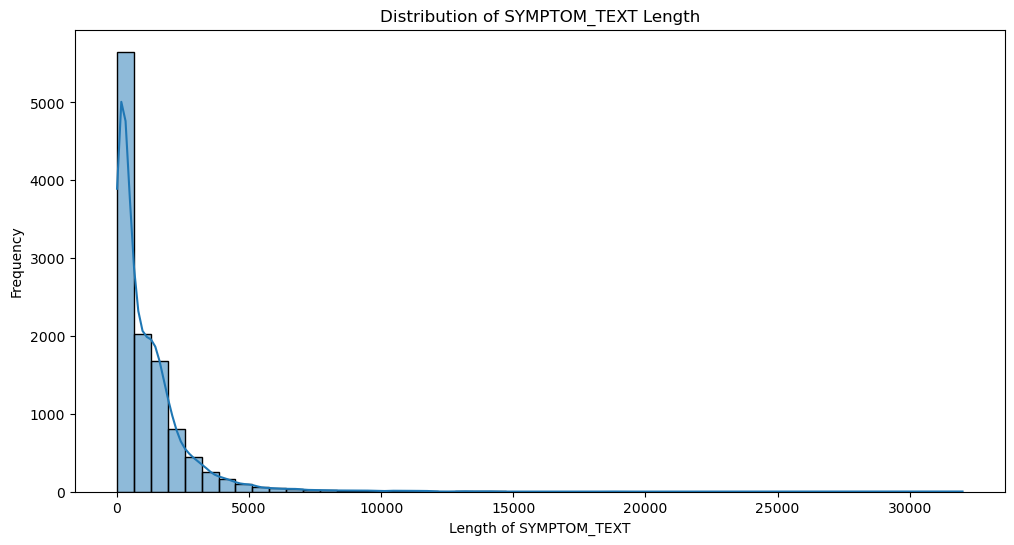

In [89]:

# Visualizing lengths
plt.figure(figsize=(12, 6))
sns.histplot(df1['SYMPTOM_TEXT_LENGTH'], bins=50, kde=True)
plt.title('Distribution of SYMPTOM_TEXT Length')
plt.xlabel('Length of SYMPTOM_TEXT')
plt.ylabel('Frequency')
plt.show()

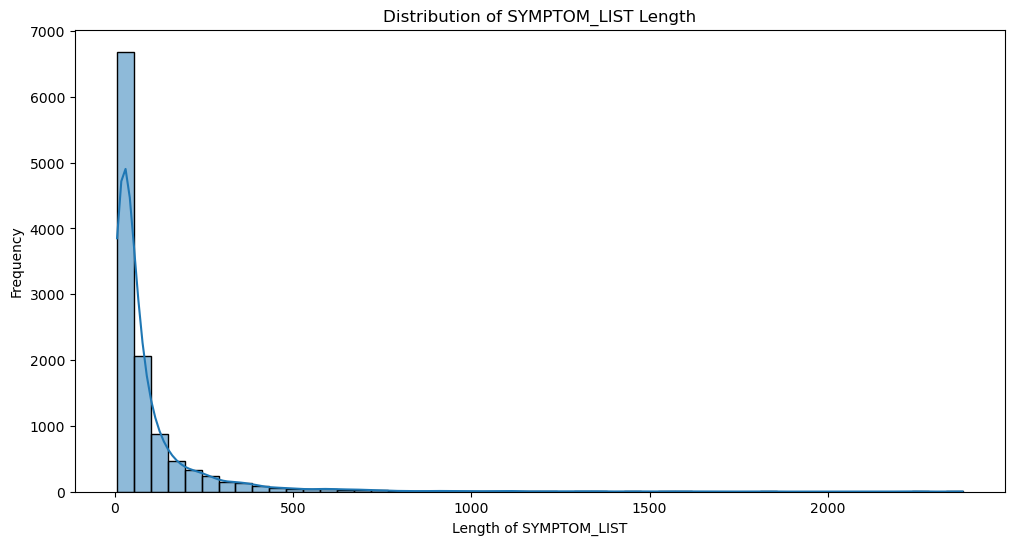

In [90]:

plt.figure(figsize=(12, 6))
sns.histplot(df1['SYMPTOM_LIST_LENGTH'], bins=50, kde=True)
plt.title('Distribution of SYMPTOM_LIST Length')
plt.xlabel('Length of SYMPTOM_LIST')
plt.ylabel('Frequency')
plt.show()

In [91]:
# 5. Duplicates
print("\nNumber of duplicate rows:")
print(df1.duplicated().sum())


Number of duplicate rows:
1162


In [92]:
# 6. Data Quality Checks
# Check for string quality
df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.strip()  # Remove leading/trailing whitespace
df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.lower() 
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].str.lower()  # Convert to lowercase


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/163987829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.strip()  # Remove leading/trailing whitespace
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/163987829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.lower()
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/163987829.py:5: SettingWithCopyWarning: 
A valu

In [93]:
df1

,VAERS_ID,SYMPTOM_TEXT,SYMPTOM_LIST,SYMPTOM_TEXT_LENGTH,SYMPTOM_LIST_LENGTH
0,2728994,muscle at the injection site is sore; he canno...,"['sore', 'muscle pain', 'muscle pain', 'sore',...",1916,131
1,2729004,micro-seizures starting approximately 2 weeks ...,"['seizures', 'seizure', 'auto-immune disease',...",645,62
2,2729006,"on september 14, 2023, i was admitted to hospi...","['endocarditis', 'strep mitis', 'fever', 'chil...",709,50
3,2729006,"on september 14, 2023, i was admitted to hospi...","['endocarditis', 'strep mitis', 'fever', 'chil...",709,50
4,2729006,"on september 14, 2023, i was admitted to hospi...","['endocarditis', 'strep mitis', 'fever', 'chil...",709,50
...,...,...,...,...,...
17396,2802200,"very sore arm and swelling. large, hard lump a...","['sore', 'swelling']",159,20
17415,2802224,within 1 hour of vaccine pt. had (l) calf and ...,['pain'],215,8
17416,2802168,menstrual cycle stopped; fertility issues; thi...,"['infertility', 'amenorrhea']",1942,29
17417,2802232,vitiligo; this spontaneous report received fro...,"['vitiligo', 'vitiligo']",754,24


In [94]:
symptom_counts.head(30)

SYMPTOM_LIST
pain                   6483
fever                  2854
fatigue                2398
headache               1969
tenderness             1758
swelling               1506
allergies              1487
muscle pain            1238
rash                   1210
chills                 1199
death                  1193
sore                   1175
nausea/vomiting        1016
cough                   939
nausea                  814
allergy                 779
dizziness               747
aches                   586
itching                 554
shortness of breath     536
hypertension            480
infection               460
diarrhea                450
pneumonia               416
weakness                408
vomiting                408
itchy                   389
allergic                382
chest pain              375
numbness                365
Name: count, dtype: int64

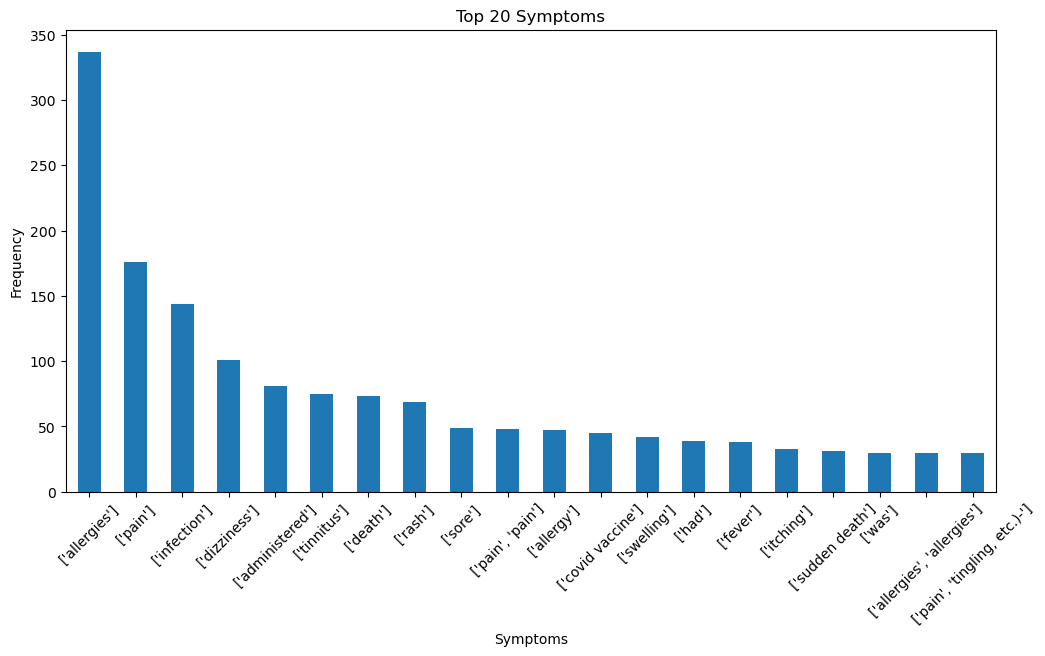

In [95]:

# 7. Visualizations
# Distribution of symptoms
symptom_counts = df1['SYMPTOM_LIST'].explode().value_counts()
plt.figure(figsize=(12, 6))
symptom_counts[0:20].plot(kind='bar')
plt.title('Top 20 Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


/Users/snehadharne/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


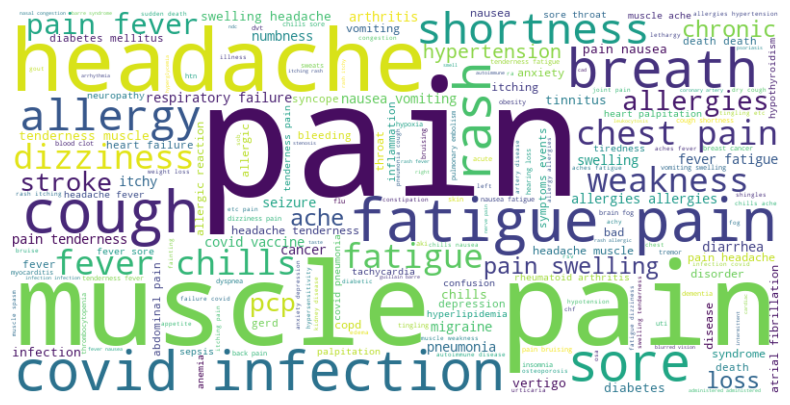

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to evaluate the string representation of a list and remove duplicates
def get_unique_symptoms(symptom_list_str):
    try:
        # Convert string representation of list to an actual list
        symptoms = eval(symptom_list_str)
        # Remove duplicates and return as a space-separated string
        unique_symptoms = set(symptoms)
        return ' '.join(unique_symptoms)
    except (SyntaxError, NameError):  # Handle any potential errors in eval
        return ''

# Apply the function to the SYMPTOM_LIST column
unique_symptoms_list = df1['SYMPTOM_LIST'].apply(get_unique_symptoms)

# Combine all unique symptoms into a single string
text_for_word_cloud = ' '.join(unique_symptoms_list)

# Define a set of words to exclude
excluded_words = {'WAS','CAN'}

# Remove excluded words from the text
filtered_text = ' '.join(word for word in text_for_word_cloud.split() if word not in excluded_words)

# Generate the word cloud with filtered text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:

# 8. Correlation and Relationships
grouped_df1 = df1.groupby('VAERS_ID')['SYMPTOM_LIST'].apply(list).reset_index()
print("\nGrouped symptoms by VAERS_ID:")
print(grouped_df1.head())

# 9. Prepare for NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have NLTK stopwords downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df1['CLEANED_SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].apply(clean_text)

print("\nCleaned SYMPTOM_TEXT added to DataFrame.")


Grouped symptoms by VAERS_ID:
   VAERS_ID                                       SYMPTOM_LIST
0   2728994  [['sore', 'muscle pain', 'muscle pain', 'sore'...
1   2729004  [['seizures', 'seizure', 'auto-immune disease'...
2   2729006  [['endocarditis', 'strep mitis', 'fever', 'chi...
3   2729010  [['12/30/23 fever', 'aches', 'pains', 'fatigue...
4   2729014                         [['shoulder pain', 'pcp']]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snehadharne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/snehadharne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Cleaned SYMPTOM_TEXT added to DataFrame.


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/1456338071.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLEANED_SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].apply(clean_text)


In [98]:
df1['SYMPTOM_LIST']

0        ['sore', 'muscle pain', 'muscle pain', 'sore',...
1        ['seizures', 'seizure', 'auto-immune disease',...
2        ['endocarditis', 'strep mitis', 'fever', 'chil...
3        ['endocarditis', 'strep mitis', 'fever', 'chil...
4        ['endocarditis', 'strep mitis', 'fever', 'chil...
                               ...                        
17396                                 ['sore', 'swelling']
17415                                             ['pain']
17416                        ['infertility', 'amenorrhea']
17417                             ['vitiligo', 'vitiligo']
17418    ['tinnitus', 'tinnitus', 'tinnitus', 'tinnitus...
Name: SYMPTOM_LIST, Length: 11361, dtype: object

In [99]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from collections import Counter

In [ ]:
# Step 1: Create a Grand Dictionary of Symptoms
symptom_list = df1['SYMPTOM_LIST'].explode()  # Flatten the list of lists
symptom_counts = Counter(symptom_list)         # Count each symptom occurrence
grand_dict_of_symptoms = dict(symptom_counts)  # Convert to dictionary

In [102]:
import ast

# Clean the strings and convert to lists
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: ast.literal_eval(x.strip()) if isinstance(x, str) else x)

# Alternatively, if you just want to strip the brackets and split the symptoms:
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: x.strip('[]').split(', ') if isinstance(x, str) else x)

# Print to check the updated SYMPTOM_LIST
print(df1[['VAERS_ID', 'SYMPTOM_LIST']])

       VAERS_ID                                       SYMPTOM_LIST
0       2728994  [sore, muscle pain, muscle pain, sore, pain, m...
1       2729004  [seizures, seizure, auto-immune disease, encep...
2       2729006         [endocarditis, strep mitis, fever, chills]
3       2729006         [endocarditis, strep mitis, fever, chills]
4       2729006         [endocarditis, strep mitis, fever, chills]
...         ...                                                ...
17396   2802200                                   [sore, swelling]
17415   2802224                                             [pain]
17416   2802168                          [infertility, amenorrhea]
17417   2802232                               [vitiligo, vitiligo]
17418   2802233  [tinnitus, tinnitus, tinnitus, tinnitus, tinni...

[11361 rows x 2 columns]


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/1433918512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: ast.literal_eval(x.strip()) if isinstance(x, str) else x)
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/1433918512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: x.strip('[]').split(', ') if isinstance(x, str) else x)


So far, this NER model has not been used alongwith medical abbrevation. The following apriori alogrithm was run to get association rules without running a medical abbreviation dictionary

In [ ]:
symptom_list = df1['SYMPTOM_LIST'].explode()  
symptom_counts = Counter(symptom_list)         
grand_dict_of_symptoms = dict(symptom_counts) 

In [ ]:
symptom_dummies = df1['SYMPTOM_LIST'].apply(lambda x: pd.Series(1, index=set(x))).fillna(0)
frequent_itemsets = apriori(symptom_dummies, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("Grand Dictionary of Symptoms:", grand_dict_of_symptoms)
print("Frequent Itemsets:", frequent_itemsets)
print("Association Rules:", rules)


/Users/snehadharne/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Grand Dictionary of Symptoms: {'sore': 1175, 'muscle pain': 1238, 'pain': 6483, 'seizures': 86, 'seizure': 163, 'auto-immune disease': 4, 'encephalitis': 28, 'endocarditis': 7, 'strep mitis': 3, 'fever': 2854, 'chills': 1199, '12/30/23 fever': 1, 'aches': 586, 'pains': 196, 'fatigue': 2398, 'sweats': 101, 'diarrhea': 450, 'loss of appetite': 64, 'diarhea': 2, 'shoulder pain': 32, 'pcp': 285, 'fog': 80, 'respiratory failure': 145, 'gerd': 166, 'htn': 283, 'shortness of breath': 536, 'fevers': 42, 'respiratory distress': 36, 'sepsis': 209, 'pneumonia': 416, 'infections': 31, 'tachycardia': 179, 'hypotensive': 15, 'urinary incontinence': 9, 'urinary retention': 8, 'incontinence': 24, 'hypomagnesemia': 15, 'trauma': 28, 'left shoulder pain': 4, 'anxiety': 314, 'floaters': 40, 'retinal tear': 4, 'hypertension hyperlipidemia diabetes mellitus': 1, 'nonobstructive coronary artery disease': 2, 'congestive heart failure nonischemic cardiomyopathy': 2, 'obstructive sleep apnea': 7, 'morbid obesi

In [105]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(muscle pain),(pain),0.037233,0.197870,0.030807,0.827423,4.181652,0.023440,4.647959,0.790284
1,(muscle pain),(fever),0.037233,0.118299,0.019188,0.515366,4.356457,0.014784,1.819314,0.800251
2,(muscle pain),(fatigue),0.037233,0.099903,0.027374,0.735225,7.359371,0.023655,3.399473,0.897536
3,(muscle pain),(swelling),0.037233,0.063287,0.018924,0.508274,8.031298,0.016568,1.904951,0.909344
4,(muscle pain),(headache),0.037233,0.082299,0.019981,0.536643,6.520643,0.016916,1.980548,0.879383
...,...,...,...,...,...,...,...,...,...,...
1228,"(tenderness, swelling)","(headache, muscle pain, fever, fatigue, pain)",0.020861,0.012851,0.011003,0.527426,41.041703,0.010734,2.088878,0.996421
1229,"(muscle pain, fever)","(headache, tenderness, fatigue, pain, swelling)",0.019188,0.013907,0.011003,0.573394,41.229967,0.010736,2.311486,0.994835
1230,"(muscle pain, swelling)","(headache, tenderness, fever, fatigue, pain)",0.018924,0.013291,0.011003,0.581395,43.743262,0.010751,2.357138,0.995988
1231,"(fever, swelling)","(headache, tenderness, muscle pain, fatigue, p...",0.021477,0.015580,0.011003,0.512295,32.882398,0.010668,2.018475,0.990869
